In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.reset_defaults
sns.set_style(style='darkgrid')
sns.set_context(context='notebook')
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['figure.figsize'] = (20.0, 10.0)
font = {'size'   : 20}
plt.rc('font', **font)
plt.ion()
%matplotlib inline

In [2]:
import altair

Observations: most students have average scores around 80, should look at number of assessments

In [ ]:
To Do:

In [3]:
st_assess = pd.read_csv('studentAssessment.csv')

In [3]:
st_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
id_assessment     173912 non-null int64
id_student        173912 non-null int64
date_submitted    173912 non-null int64
is_banked         173912 non-null int64
score             173739 non-null float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [5]:
st_assess['id_student'].nunique()

23369

In [6]:
st_assess.sample(5)

,id_assessment,id_student,date_submitted,is_banked,score
52504,24289,511473,209,0,50.0
149707,34903,2020628,152,0,56.0
135054,34888,612528,87,0,87.0
78682,25350,396292,88,0,96.0
37447,15018,623845,154,0,100.0


In [8]:
st_assess['is_banked'].sum()

1909

In [11]:
by_student = st_assess.groupby(by='id_student').mean().drop('id_assessment', axis=1)

In [17]:
by_student.sort_values(by=['score'], axis=0, ascending=False, inplace=True)

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


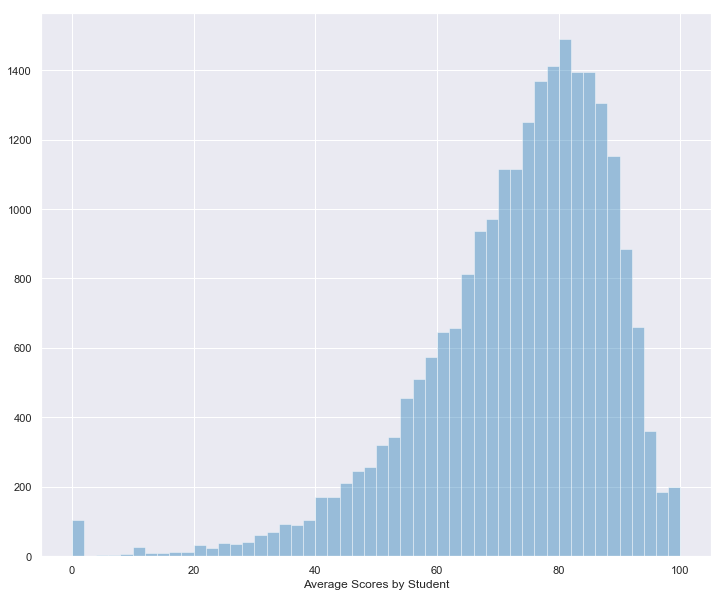

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
sns.distplot(by_student.dropna()['score'], kde=False, axlabel='Average Scores by Student' )

Altair

In [4]:
st_assess.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [7]:
altair.Chart(st_assess).mark_point().encode(
    x = 'date_submitted',
    y = 'score',
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

Chart({
  data:         id_assessment  id_student  date_submitted  is_banked  score
  0                1752       11391              18          0   78.0
  1                1752       28400              22          0   70.0
  2                1752       31604              17          0   72.0
  3                1752       32885              26          0   69.0
  4                1752       38053              19          0   79.0
  5                1752       45462              20          0   70.0
  6                1752       45642              18          0   72.0
  7                1752       52130              19          0   72.0
  8                1752       53025               9          0   71.0
  9                1752       57506              18          0   68.0
  10               1752       58873              19          0   73.0
  11               1752       59185              18          0   67.0
  12               1752       62155              17          0   73.0
  13  

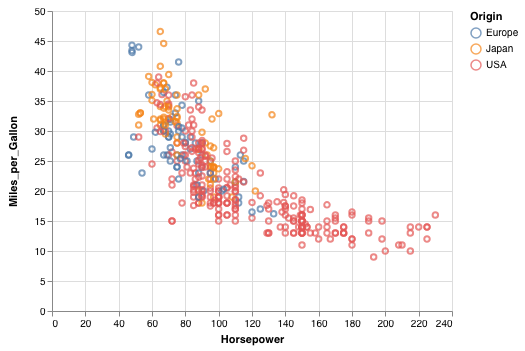

In [10]:
import altair as alt

# load a simple dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

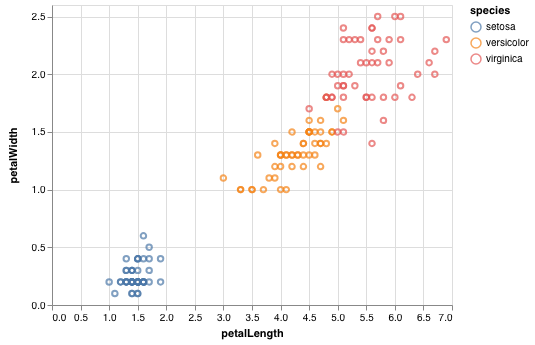

In [13]:
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)